# Neural Networks From Scratch

References:
<br>https://udlbook.github.io/udlbook/
<br>https://www.youtube.com/watch?v=VMj-3S1tku0 
<br>https://www.youtube.com/watch?v=dB-u77Y5a6A
<br>https://www.youtube.com/watch?v=khUVIZ3MON8

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

## Computational Graph

### Simple Example

$$f(x,y,z) = (x+y)*z$$
$$ q = x * y $$
$$ f = q * z $$
$$\frac{\partial f}{\partial q} = z, \enspace\frac{\partial f}{\partial z} = q$$
$$\frac{\partial f}{\partial x} = \frac{\partial f}{\partial q} * \frac{\partial q}{\partial x}$$
$$\frac{\partial f}{\partial y} = \frac{\partial f}{\partial q} * \frac{\partial q}{\partial y}$$

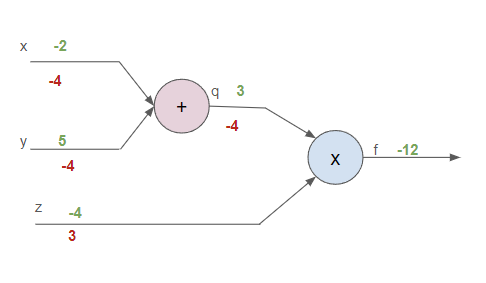

In [2]:
class simplenn:
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
        
    def forward(self):
        self.q = self.x + self.y
        self.f = self.q*self.z
        return self.f
    
    def backward(self):
        dz = self.q  # derivative of f (=qz) wrt to z is q
        dq = self.z  # derivative of f wrt to q is z
        dx = dq * 1  # df/dx = df/dq * df/dx = dq * 1
        dy = dq * 1  # ddf/dx = df/dq * df/dy = dq * 1  
        return dz,dq,dx,dy

In [3]:
nn = simplenn(-2,5,-4)
nn.forward()

-12

In [4]:
nn.backward()

(3, -4, -4, -4)

#### Observations

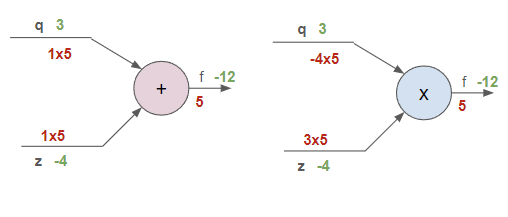

### Trying to train simple network

$$
Forward\;pass :y_{pred} = x*w \\[1em]
Loss\;function :C = (y_{pred}-y)^2\\[1em]
Derivative\;of\;loss\;function : \frac{\partial C}{\partial y_{pred}} = 2*(y_{pred}-y)\\[1em]
Backpropogation : \frac{\partial C}{\partial w} = \frac{\partial C}{\partial y_{pred}}* \frac{\partial y_{pred}}{\partial w} = x * 2*(y_{pred}-y)\\$$

In [5]:
class simplenn:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.w = random.random()
        
    def forward(self):
        self.y_pred = self.x*self.w
        return self.y_pred
    
    def loss(self):
        return (self.y_pred - self.y)**2
    
    def backward(self):
        self.dy_pred = 2*(self.y_pred-self.y)
        self.dw = self.dy_pred * self.x
        return self.dw
    
    def optimize(self,lr=0.01):
        self.w  -= lr* self.dw 

    
    def train(self,num_iter=100): 
        self.L = []
        for epoch in range(0,num_iter):
            self.forward()
            error = self.loss()
            self.backward()
            self.optimize()
            self.L.append(error)
            if epoch % 10 ==0:
                print(f'Epoch: {num_iter} | Error: {error:.6f} | Weight: {self.w:.6f}')
                
    def plot_loss(self):
        plt.figure(figsize=(5,3))        
        plt.title('Loss Curve')
        plt.xlabel('Number of iterations')
        plt.ylabel('Error (MSE)')
        plt.plot(range(0,100),self.L)

In [6]:
## input = 1.5, desired output = 0.5
nn = simplenn(1.5,0.5)

In [7]:
nn.train()

Epoch: 100 | Error: 0.823742 | Weight: 0.911173
Epoch: 100 | Error: 0.327988 | Weight: 0.697954
Epoch: 100 | Error: 0.130595 | Weight: 0.563411
Epoch: 100 | Error: 0.051999 | Weight: 0.478514
Epoch: 100 | Error: 0.020704 | Weight: 0.424943
Epoch: 100 | Error: 0.008244 | Weight: 0.391140
Epoch: 100 | Error: 0.003282 | Weight: 0.369810
Epoch: 100 | Error: 0.001307 | Weight: 0.356350
Epoch: 100 | Error: 0.000520 | Weight: 0.347857
Epoch: 100 | Error: 0.000207 | Weight: 0.342498


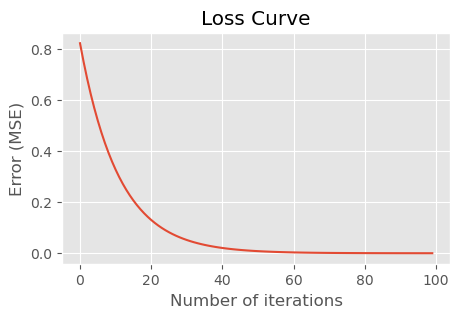

In [8]:
nn.plot_loss()

#### More Advanced problem

http://neuralnetworksanddeeplearning.com/chap2.html

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=20, n_features=1, noise=1, random_state=42)
y = y.reshape(20,1)

In [3]:
X.shape,y.shape

((20, 1), (20, 1))

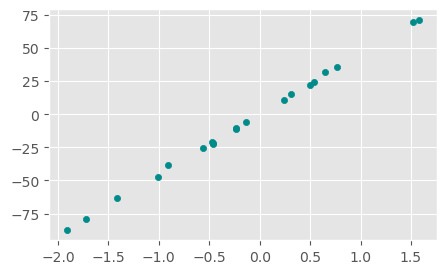

In [4]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,c='darkcyan',s=20);

In [5]:
X_norm = np.linalg.norm(X)
y_norm =  np.linalg.norm(y)
X = X / X_norm
y = y / y_norm

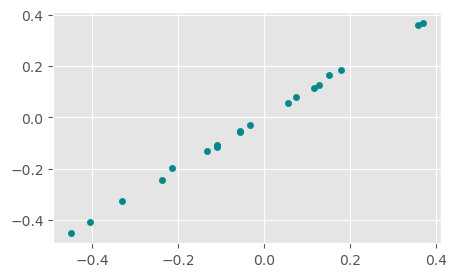

In [6]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,c='darkcyan',s=20);

$Forward\;Pass:\\[1em]$
$$h = W*X+B\\[1em]
y_{pred} = a(h)\\[1em]
Loss = \frac {1}{n}(y_{true} - y_{pred})^2$$
$Backward\;Pass:\\[1em]$
$$\frac {\partial L}{\partial y_{pred}} = 2*(y_{pred} - y_{true})\\[1em]
\frac {\partial L}{\partial h} = \frac {\partial L}{\partial y_{pred}} * \frac {\partial y_{pred}}{\partial h}\\[1em]
\frac {\partial L}{\partial w} =  \frac {\partial L}{\partial y_{pred}} * \frac {\partial y_{pred}}{\partial h}* \frac {\partial h}{\partial w}\\[1em]
\frac {\partial L}{\partial b} =  \frac {\partial L}{\partial y_{pred}} * \frac {\partial y_{pred}}{\partial h}* \frac {\partial h}{\partial b}\\$$

In [10]:
w1 = np.random.randn(X.shape[0],X.shape[1]) * np.sqrt(X.shape[0])**-1 
b1 = np.zeros((X.shape[0],1))

lr = 1e-1
grads = []
loss_log = []
num_iter = 1e1
for i in range(int(num_iter)):
    # forward pass
    h = w1 * X + b1
    y_pred = np.tanh(h)
    C = ((y_pred - y)**2).mean()
    
    loss_log.append(C)
    # backward pass
    dCdy_pred = 2 * (y_pred - y)
    dCdact = dCdy_pred * (1 - np.tanh(h)**2)
    dCdw1 = dCdact * X
    dCdb1 = dCdact 
    grads.extend([dCdy_pred, dCdact ,dCdw1,dCdb1])
    # gradient descent
    w1 -= lr * dCdw1
    b1 -= lr * dCdb1
    if i % (num_iter / 10) == 0:
        print(f'Error : {C}')
        
        #break # to plot graphs than run full training

Error : 0.05579765553360675
Error : 0.033640167721764515
Error : 0.020401115968482608
Error : 0.01255578047538751
Error : 0.007854344448689177
Error : 0.0049874530190916425
Error : 0.003208100113656219
Error : 0.0020860972024807772
Error : 0.0013689187539658754
Error : 0.0009052119546298422


##### Diagnosing Training

`Note:` Although we have already applied intialisation to weights but if tanh output  saturates that is, it is either -1 or 1, multiply weight at initialisation by a number smaller than 1.

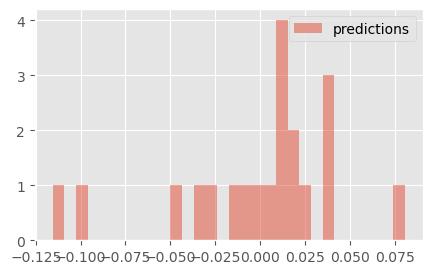

In [8]:
plt.figure(figsize=(5,3))
plt.hist(y_pred,bins=30,alpha=0.5)
plt.legend(['predictions']);

`Note:` Ensure that the gradients are not zero after first iteration. Otherwise no subsequent gradients will flow during backpropogations.

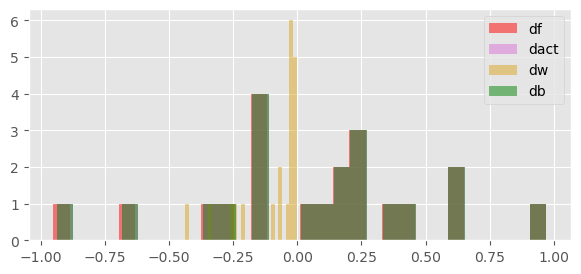

In [9]:
plt.figure(figsize=(7,3))
labels = ['df','dact','dw','db']
color = ['red','orchid','goldenrod','green']
for i,label,c in zip(grads,labels,color):
    plt.hist(i,bins=30,alpha=0.5,color=c)
    #sns.kdeplot(i,color=c,label=label)
plt.legend(labels)
plt.show()

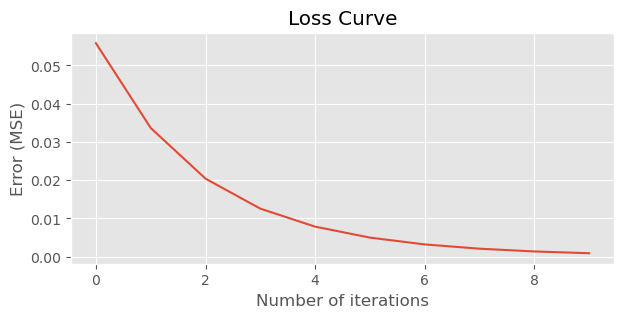

In [11]:
plt.figure(figsize=(7,3))
plt.plot(np.arange(0,len(loss_log)),loss_log)
plt.title('Loss Curve')
plt.xlabel('Number of iterations')
plt.ylabel('Error (MSE)');

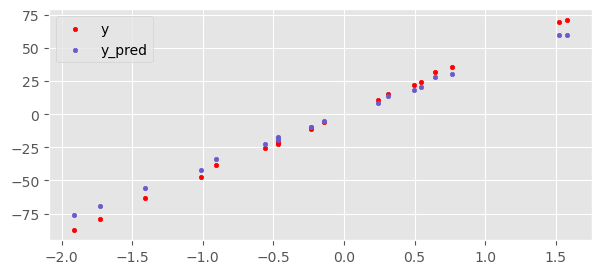

In [12]:
plt.figure(figsize=(7,3))
plt.scatter(X*X_norm,y*y_norm,c='red',s=10)             # De-normalising
plt.scatter(X*X_norm,y_pred*y_norm,c='slateblue',s=10)
plt.legend(['y','y_pred']);

### Fitting Neural network onto a sine wave

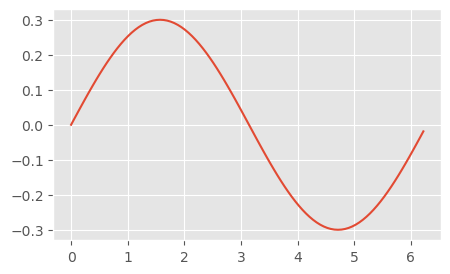

In [13]:
cycles = 1 # how many sine cycles
resolution = 100 # how many datapoints to generate

length = np.pi * 2 * cycles
X = np.arange(0, length, length / resolution)
y = np.sin(X)*0.3
plt.figure(figsize=(5,3))
plt.plot(X,y);

In [14]:
X.shape,y.shape

((100,), (100,))

In [15]:
X = X.reshape((X.shape[0],1))
y = y.reshape((y.shape[0],1))
X.shape,y.shape

((100, 1), (100, 1))

In [22]:
#X_norm = np.linalg.norm(X)
#X = X / X_norm
#y_norm = np.linalg.norm(X)
#y = y / y_norm

##### Forward Pass

$$ f_1 = w_1 * X + b_1 \\[1em]
h_1 = ReLU(f_1) \\[1em]
f_2 = w_2 * h_1 + b_2 \\[1em]
h_2 = tanh(f_2) \\[1em]
C_{avg} = \frac {1}{n}  (y-h_2)^2$$

##### Backpropogation

$$\frac{\partial C}{\partial h_2} = 2*(h_2-y)\\[1em]
\frac{\partial C}{\partial f_2} = \frac{\partial C}{\partial h_2}* \frac{\partial h_2}{\partial f_2}\\[1em]
\frac{\partial C}{\partial w_2} = (\frac{\partial C}{\partial h_2}* \frac{\partial h_2}{\partial f_2})*\frac{\partial f_2}{\partial w_2}\\[1em]
\frac{\partial C}{\partial b_2} = (\frac{\partial C}{\partial h_2}* \frac{\partial h_2}{\partial f_2})*1\\[1em]
\frac{\partial C}{\partial h_1} = (\frac{\partial C}{\partial h_2}* \frac{\partial h_2}{\partial f_2})*\frac{\partial f_2}{\partial h_1}\\[1em]
\frac{\partial C}{\partial f_1} = (\frac{\partial C}{\partial h_2}* \frac{\partial h_2}{\partial f_2}*\frac{\partial f_2}{\partial h_1})*\frac{\partial h_1}{\partial f_1}\\[1em]
\frac{\partial C}{\partial w_1} = (\frac{\partial C}{\partial h_2}* \frac{\partial h_2}{\partial f_2}*\frac{\partial f_2}{\partial h_1}*\frac{\partial h_1}{\partial f_1})*X\\[1em]
\frac{\partial C}{\partial b_1} = (\frac{\partial C}{\partial h_2}* \frac{\partial h_2}{\partial f_2}*\frac{\partial f_2}{\partial h_1}*\frac{\partial h_1}{\partial f_1})*1\\[1em]

$$ 

#### Training Loop

In [19]:
lr = 1e-2
num_iter = 1e3

w1 = np.random.randn(X.shape[0],X.shape[1]) * np.sqrt(X.shape[0])**-1 
b1 = np.zeros((X.shape[0],1))
w2 = np.random.randn(X.shape[0],X.shape[1]) * np.sqrt(X.shape[0])**-1 
b2 = np.zeros((X.shape[0],1))
#b2 = np.random.randn(X.shape[0],1)*1e-2

loss_log = []
grads = []
for i in range(int(num_iter)):
    # forward pass
    f1 = w1 * X + b1
    h1 = np.tanh(f1)
    f2 = w2 * h1 + b2
    h2 = np.tanh(f2)
    C = ((y-h2)**2).mean()
    
    # backward pass
    dCdh2 = 2*(f2-y)
    dCdf2= dCdh2 * (1-np.tanh(f2)**2)
    dCdh1 = dCdh2 *  w2      #dcdf1 = dcdh2 * dh2df1
    dCdf1 = dCdf2 * (1-np.tanh(f1)**2)

    dCdw2 = dCdf2 * h1
    dCdb2 = dCdf2 
    dCdw1 = dCdf1 * X
    dCdb1 = dCdf1
    
    loss_log.append(C)
    grads.extend([dCdw1,dCdb2,dCdw1,dCdb1])
    # gradient descent
    w2 -= lr * dCdw2
    b2 -= lr * dCdb2
    w1 -= lr * dCdw1
    b1 -= lr * dCdb1
    if i % (num_iter / 10) == 0:
        lr /= 1.1
        print(f'Error : {C}')
        #break

Error : 0.045197532488429
Error : 0.0006352756257112309
Error : 4.7094390449055784e-05
Error : 2.614325083467307e-05
Error : 2.4179241417210682e-05
Error : 2.3876524930010046e-05
Error : 2.3814736297544486e-05
Error : 2.3799414738716477e-05
Error : 2.3794988141218497e-05
Error : 2.379353545127163e-05


`Note:` There is an issue with loss becoming constant.

##### Diagnosing Training

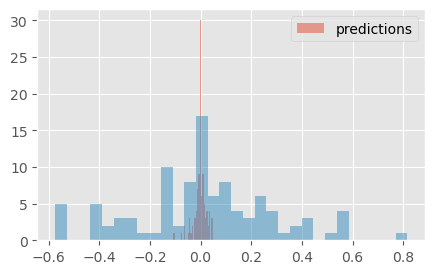

In [17]:
plt.figure(figsize=(5,3))
plt.hist(h2,bins=30,alpha=0.5)
plt.hist(h1,bins=30,alpha=0.5)
plt.legend(['predictions']);

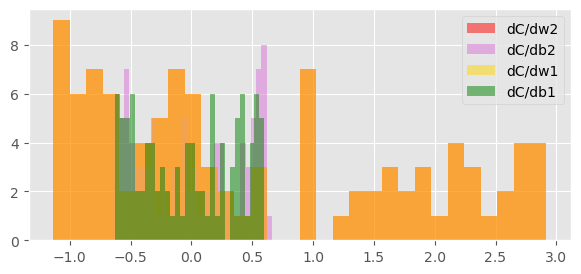

In [18]:
plt.figure(figsize=(7,3))
labels = ['dC/dw2','dC/db2','dC/dw1','dC/db1']
color = ['red','orchid','gold','green']
for i,label,c in zip(grads,labels,color):
    plt.hist(i,bins=30,alpha=0.5,color=c)
    #sns.kdeplot(i,color=c,label=label)
plt.legend(labels)
plt.show()

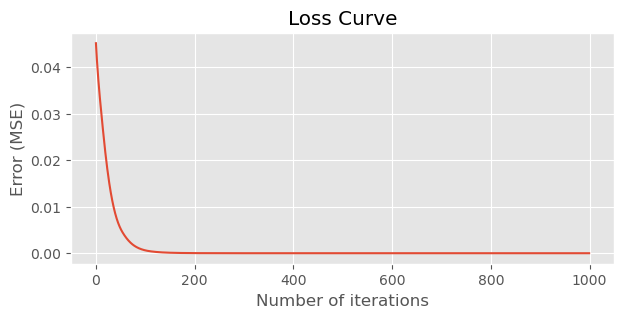

In [20]:
plt.figure(figsize=(7,3))
plt.plot(np.arange(0,len(loss_log)),loss_log)
plt.title('Loss Curve')
plt.xlabel('Number of iterations')
plt.ylabel('Error (MSE)');

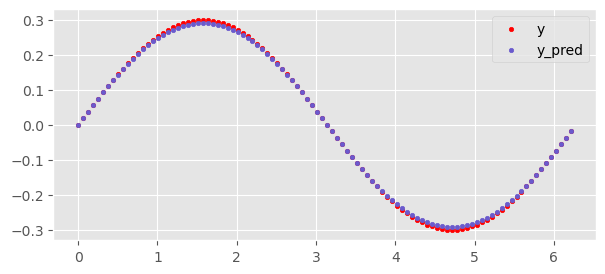

In [21]:
plt.figure(figsize=(7,3))
plt.scatter(X,y,c='red',s=10)             # De-normalising
plt.scatter(X,h2,c='slateblue',s=10)
plt.legend(['y','y_pred']);

`Note:` For some reason sine wave with smaller amplitude leads to easier fitting by our model. 